MODELO CON KNN

In [ ]:
#Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Leer los CSV
df_descriptores = pd.read_csv("padel_83_1490.csv")
df_feb = pd.read_csv("FEB_catechol83.csv")

# Unir los archivos por índice (asumen el mismo orden de moléculas)
df_combined = df_descriptores.copy()
df_combined['FEB'] = df_feb['FEB']

# Eliminar columnas no numéricas (como nombres)
if 'molecula' in df_combined.columns:
    df_combined = df_combined.drop(columns=['molecula'])

#  Filtrar columnas con más del 90% de ceros
threshold = int(0.9 * len(df_combined))
df_filtered = df_combined.loc[:, (df_combined == 0).sum() < threshold]

#  Separar en X (descriptores) e Y (target: FEB)
X = df_filtered.drop(columns=['FEB']).values
y = df_filtered['FEB'].values

#  Escalamiento
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# P Separar datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#  Entrenar modelo KNN
knn = KNeighborsRegressor(n_neighbors=4)
knn.fit(X_train, y_train)

# : Hacer predicciones
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# Evaluar el modelo
def evaluate_model(y_true, y_pred, label=""):
    print(f"Resultados para {label}")
    print("R2:", r2_score(y_true, y_pred))
    # Calculate RMSE manually using NumPy
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("MSE:", mean_squared_error(y_true, y_pred))
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("-" * 30)

evaluate_model(y_train, y_train_pred, label="Entrenamiento")
evaluate_model(y_test, y_test_pred, label="Prueba")




Resultados para Entrenamiento
R2: 0.6425035872074227
RMSE: 0.3804029960370178
MSE: 0.1447064393939394
MAE: 0.2874999999999999
------------------------------
Resultados para Prueba
R2: 0.6256913716814163
RMSE: 0.3154711695599605
MSE: 0.09952205882352937
MAE: 0.2426470588235294
------------------------------


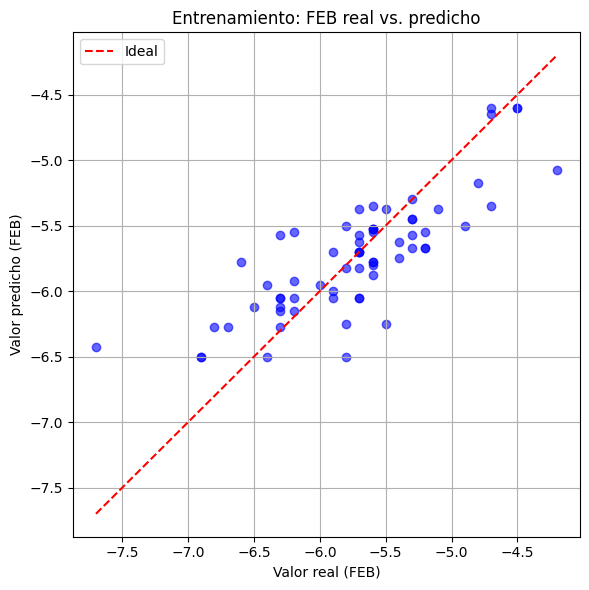

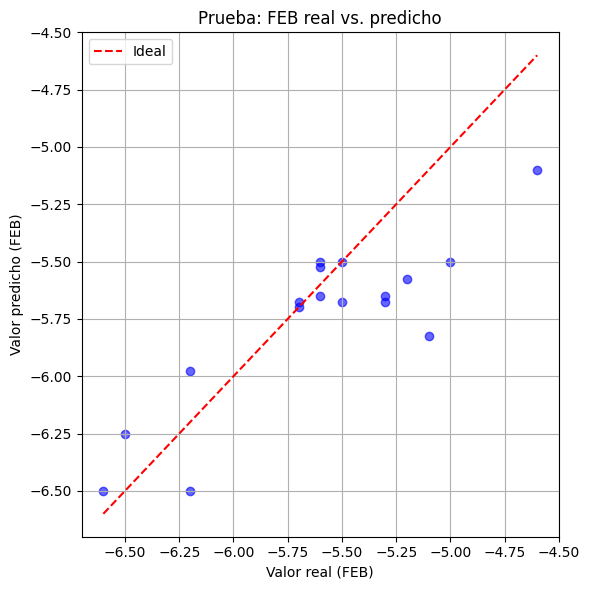

In [ ]:
# Función para graficar real vs. predicho
def plot_real_vs_pred(y_true, y_pred, title=""):
    plt.figure(figsize=(6, 6))
    plt.scatter(y_true, y_pred, color='blue', alpha=0.6)
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], 'r--', label="Ideal")
    plt.xlabel("Valor real (FEB)")
    plt.ylabel("Valor predicho (FEB)")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Gráfico para entrenamiento
plot_real_vs_pred(y_train, y_train_pred, title="Entrenamiento: FEB real vs. predicho")

# Gráfico para prueba
plot_real_vs_pred(y_test, y_test_pred, title="Prueba: FEB real vs. predicho")

Resultados para Entrenamiento
R2: 0.9384642822267346
RMSE: 0.15782351802221653
MSE: 0.024908262840908902
MAE: 0.11327045454545476
------------------------------
Resultados para Prueba
R2: 0.5054400995575223
RMSE: 0.3626220484195631
MSE: 0.13149474999999997
MAE: 0.296735294117647
------------------------------


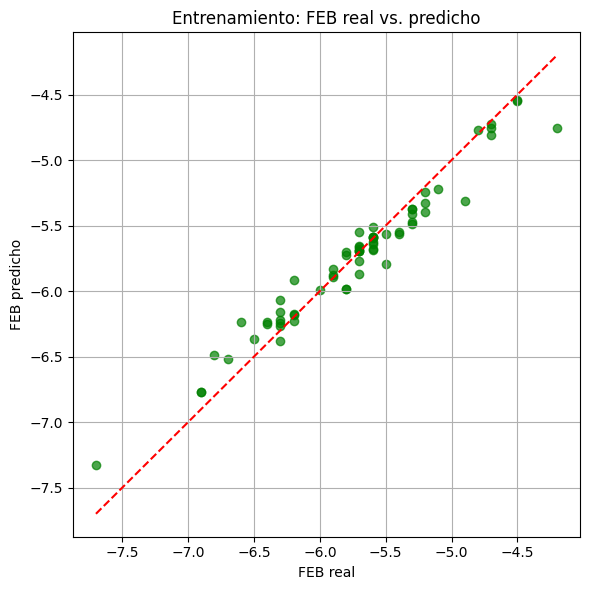

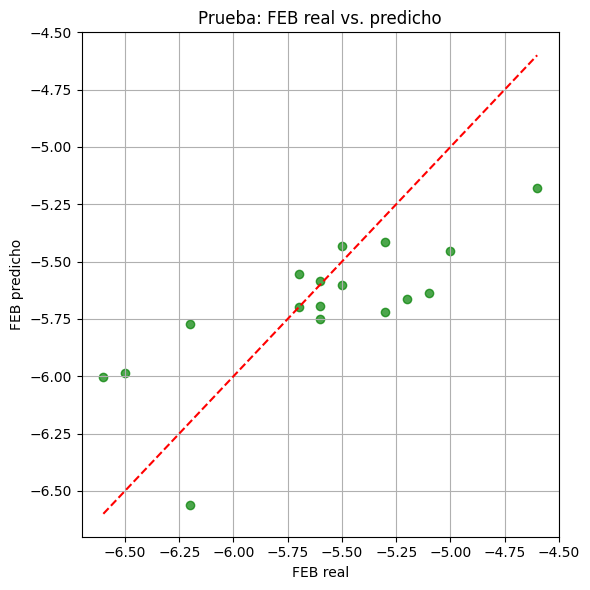

In [ ]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from google.colab import files


#  Leer los archivos
df_descriptores = pd.read_csv("padel_83_1490.csv")
df_feb = pd.read_csv("FEB_catechol83.csv")

# Unir y limpiar el dataset
df_combined = df_descriptores.copy()
df_combined['FEB'] = df_feb['FEB']

if 'molecula' in df_combined.columns:
    df_combined = df_combined.drop(columns=['molecula'])

# Eliminar columnas con más del 90% de ceros
threshold = int(0.9 * len(df_combined))
df_filtered = df_combined.loc[:, (df_combined == 0).sum() < threshold]

#  Separar X e y
X = df_filtered.drop(columns=['FEB']).values
y = df_filtered['FEB'].values

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Entrenar modelo Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

#  Predicciones
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Métricas
def evaluar_modelo(y_real, y_predicho, conjunto):
    print(f"Resultados para {conjunto}")
    print("R2:", r2_score(y_real, y_predicho))
    # Calculate RMSE using NumPy's sqrt function
    mse = mean_squared_error(y_real, y_predicho) # Calculate MSE first
    rmse = np.sqrt(mse) # Then calculate RMSE
    print("RMSE:", rmse)
    print("MSE:", mse)
    print("MAE:", mean_absolute_error(y_real, y_predicho))
    print("-" * 30)

evaluar_modelo(y_train, y_train_pred, "Entrenamiento")
evaluar_modelo(y_test, y_test_pred, "Prueba")

#  Gráficos real vs. predicho
def plot_real_vs_pred(y_true, y_pred, title=""):
    plt.figure(figsize=(6, 6))
    plt.scatter(y_true, y_pred, alpha=0.7, color="green")
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], 'r--')
    plt.xlabel("FEB real")
    plt.ylabel("FEB predicho")
    plt.title(title)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_real_vs_pred(y_train, y_train_pred, "Entrenamiento: FEB real vs. predicho")
plot_real_vs_pred(y_test, y_test_pred, "Prueba: FEB real vs. predicho")
